In [ ]:
import pandas as pd
from collections import Counter

file_path = 'RESULT_Final6.xlsx'  
df = pd.read_excel(file_path)

selected_columns = df.loc[:, 'Additive_Type1':'Additive_Type8']
data = selected_columns.values.flatten()
data = [x for x in data if pd.notna(x)]  
counter = Counter(data)

result_df = pd.DataFrame(counter.items(), columns=['Element', 'Count'])
result_df = result_df.sort_values(by='Count', ascending=False)

output_file = 'Additives_types_result3.xlsx' 
result_df.to_excel(output_file, index=False)
print(result_df)



In [ ]:
import pandas as pd


df = pd.read_excel('resin-additives2.xlsx')
result_dict = {}

for index, row in df.iterrows():
    type1 = row['Plastic_Type']
    if type1 in ['Special', 'Others', 'Not Specific']:
        type1 = 'Others'
    for type2 in df.columns[1:]:
        if row[type2] == 'N' or row[type2] == 'Only mention':  
            continue
        
        product_name = row[type2].split('(')[0].strip() if isinstance(row[type2], str) else ''
        
        if product_name:  
            if type1 not in result_dict:
                result_dict[type1] = {}
            if product_name not in result_dict[type1]:
                result_dict[type1][product_name] = 0
            result_dict[type1][product_name] += 1
            

result = pd.DataFrame.from_dict(result_dict, orient='index').fillna(0).astype(int)
result.index.name = 'Resin_type'
result.loc['sum'] = result.sum()
result.to_excel('Additives_types_result4.xlsx')


In [ ]:
import pandas as pd


df = pd.read_excel('Additives_types_result4.xlsx')  
df.columns = [' '.join([word.capitalize() for word in col.split()]) for col in df.columns]

sum_row = df[df.iloc[:, 0] == 'sum'].iloc[0, 1:]  
sorted_columns = sum_row.sort_values(ascending=False).index  
df_sorted = df[['Resin_type'] + sorted_columns.tolist()]  
df_sorted = df_sorted.sort_values(by='Resin_type', key=lambda x: x.map({
    'General Purpose Plastics': 1,
    'General Engineering Plastics': 2,
    'Specialty Engineering Plastics': 3,
    'Thermosetting Plastics': 4,
    'Bio-based':5,
    'Others': 6
}))
df_sorted.to_excel('Additives_types_sorted3.xlsx', index=False)


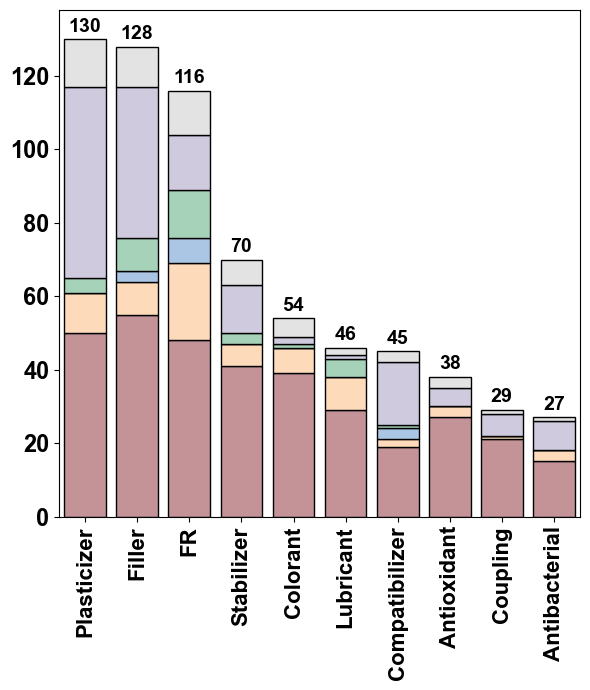

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('Additives_types_sorted2.xlsx') 
df=df.head(6)
df = df.set_index('Resin_type') 
df = df.T  
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.weight'] = 'bold'  
countries = df.index  
plastic_types = df.columns  
colors = [
    (195 / 255, 147 / 255, 152 / 255),  
    (252 / 255, 218 / 255, 186 / 255),  
    (171 / 255, 198 / 255, 228 / 255),  
    (167 / 255, 210 / 255, 186 / 255),  
    (208 / 255, 202 / 255, 222 / 255),  
    (227 / 255, 227 / 255, 227 / 255)
]

fig, ax = plt.subplots(figsize=(6, 7))  
fig.patch.set_alpha(0)  
ax.patch.set_alpha(0)  
bottom_values = [0] * len(countries)  
for idx, plastic_type in enumerate(plastic_types):
    values = df[plastic_type] 
    ax.bar(
        countries,
        values,
        bottom=bottom_values,
        label=plastic_type,
        color=colors[idx],
        edgecolor='black',  
        linewidth=1  
    )
    bottom_values = [sum(x) for x in zip(bottom_values, values)] 

for idx, country in enumerate(countries):
    total = sum(df.loc[country])  
    ax.text(idx, total + 1, f'{int(total)}', ha='center', va='bottom', fontsize=14)


plt.title("", fontsize=16, fontweight='bold')
plt.xlabel("", fontsize=18, fontweight='bold')
plt.ylabel("", fontsize=18, fontweight='bold')

plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=17)

plt.xlim(-0.5, len(countries) - 0.5)  
plt.ylim(0 , 138)  
plt.tight_layout()

plt.savefig('./additives-resin.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
